In [94]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
print(check_output(["ls", "survey.csv"]).decode("utf8"))

from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
le = LabelEncoder()

df = pd.read_csv('survey.csv')

survey.csv



In [95]:
def dataCleaning():
    df.family_history = le.fit_transform(df.family_history) 
    df.mental_health_consequence = le.fit_transform(df.mental_health_consequence)
    df.phys_health_consequence = le.fit_transform(df.phys_health_consequence)
    df.coworkers = le.fit_transform(df.coworkers)
    df.supervisor = le.fit_transform(df.supervisor)
    df.mental_health_interview = le.fit_transform(df.mental_health_interview)
    df.phys_health_interview = le.fit_transform(df.phys_health_interview)
    df.mental_vs_physical = le.fit_transform(df.mental_vs_physical)
    df.obs_consequence = le.fit_transform(df.obs_consequence)
    df.remote_work = le.fit_transform(df.remote_work)
    df.tech_company = le.fit_transform(df.tech_company)
    df.benefits = le.fit_transform(df.benefits)
    df.care_options = le.fit_transform(df.care_options)
    df.wellness_program = le.fit_transform(df.wellness_program)
    df.seek_help = le.fit_transform(df.seek_help)
    df.anonymity = le.fit_transform(df.anonymity)

    df.loc[df['work_interfere'].isnull(),['work_interfere']]=0
    df['self_employed'].fillna('Don\'t know',inplace=True)
    df.self_employed = le.fit_transform(df.self_employed)
    df.loc[df['comments'].isnull(),['comments']]=0
    df.loc[df['comments']!=0,['comments']]=1 
    df['leave'].replace(['Very easy', 'Somewhat easy', "Don\'t know", 'Somewhat difficult', 'Very difficult'], 
                         [1, 2, 3, 4, 5],inplace=True) 
    df['work_interfere'].replace(['Never','Rarely','Sometimes','Often'],[1,2,3,4],inplace=True)
    df.loc[df['Gender'].str.contains('F|w', case=False,na=False),'Gender']=2
    df.loc[df['Gender'].str.contains('queer/she',case=False,na=False),'Gender']=1
    df.loc[df['Gender'].str.contains('male leaning',case=False,na=False),'Gender']=-1
    df.loc[df['Gender'].str.contains('something kinda male',case=False,na=False),'Gender']=-1
    df.loc[df['Gender'].str.contains('ish',case=False,na=False),'Gender']=-1
    df.loc[df['Gender'].str.contains('m',case=False,na=False),'Gender']=-2
    df.loc[df['Gender'].str.contains('',na=False),'Gender']=0
    df.loc[df['no_employees']=='1-5',['no_employees']]=1
    df.loc[df['no_employees']=='6-25',['no_employees']]=2
    df.loc[df['no_employees']=='26-100',['no_employees']]=3
    df.loc[df['no_employees']=='100-500',['no_employees']]=4
    df.loc[df['no_employees']=='500-1000',['no_employees']]=5
    df.loc[df['no_employees']=='More than 1000',['no_employees']]=6

dataCleaning()

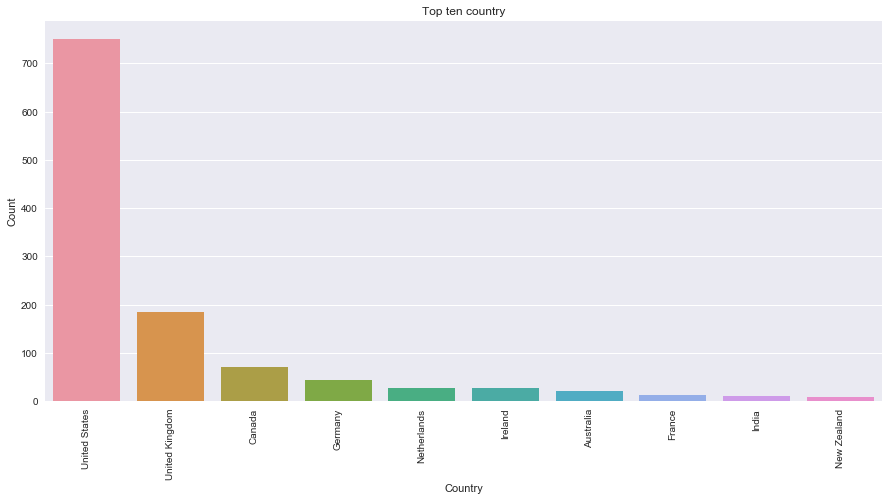

In [96]:
country_count = Counter(df['Country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(15,7))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [83]:
def prepareData():
    global df
    drop_elements = ['Timestamp','Country','state','work_interfere']
    df = df.drop(drop_elements, axis = 1)



prepareData()

X = df.drop(['treatment'],axis=1)
y = df['treatment']
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.20, random_state=1)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

clf = LogisticRegression(C=0.01).fit(X_train_std,y_train)
y_true, y_pred = y_test, clf.predict(X_test_std)


In [89]:
df.head()

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,2,0,0,Yes,2,0,1,2,1,...,2,1,1,1,2,1,0,2,0,0
1,44,-2,0,0,No,6,0,0,0,0,...,3,0,1,0,0,1,1,0,0,0
2,32,-2,0,0,No,2,0,1,1,0,...,4,1,1,2,2,2,2,1,0,0
3,31,-2,0,1,Yes,3,0,1,1,2,...,4,2,2,1,0,0,0,1,1,0
4,31,-2,0,0,No,4,1,1,2,0,...,3,1,1,1,2,2,2,0,0,0


In [86]:

l = [ ('Age', [age] ),
      ('Gender', [Gender] ), 
      ('self_employed', [se] ),
      ('family_history', [fh]),
     ('no_employees', [enum] ),
     ('remote_work', [r] ),
     ('tech_company', [tech]),
     ('benefits', [mhb] ),
     ('care_options', [mhc]),
     ('wellness_program', [dmh]),
     ('seek_help', [rmh] ),
     ('anonymity', [p] ),
     ('leave',[easyLeave]),
     ('mental_health_consequence',[MConsequence]),
     ('mental_health_consequence',[PConsequence]),
     ('coworkers',[Coworkers]),
     ('supervisor',[Supervisor]),
     ('mental_health_interview',[MHEmployer]),
     ('physical_health_interview',[PHEmployer]),
     ('mental_vs_physical',[Seriously]),
     ('obs_consequence', [ObservedConsequences]),
     ('comments', [comment])
    ]

df_test = pd.DataFrame.from_items(l)
def cleanTestData(df):
    df.family_history = le.fit_transform(df.family_history) 
    df.mental_health_consequence = le.fit_transform(df.mental_health_consequence)
    df.phys_health_consequence = le.fit_transform(df.phys_health_consequence)
    df.coworkers = le.fit_transform(df.coworkers)
    df.supervisor = le.fit_transform(df.supervisor)
    df.mental_health_interview = le.fit_transform(df.mental_health_interview)
    df.phys_health_interview = le.fit_transform(df.phys_health_interview)
    df.mental_vs_physical = le.fit_transform(df.mental_vs_physical)
    df.obs_consequence = le.fit_transform(df.obs_consequence)
    df.remote_work = le.fit_transform(df.remote_work)
    df.tech_company = le.fit_transform(df.tech_company)
    df.benefits = le.fit_transform(df.benefits)
    df.care_options = le.fit_transform(df.care_options)
    df.wellness_program = le.fit_transform(df.wellness_program)
    df.seek_help = le.fit_transform(df.seek_help)
    df.anonymity = le.fit_transform(df.anonymity)

    df['self_employed'].fillna('Don\'t know',inplace=True)
    df.self_employed = le.fit_transform(df.self_employed)
    df.loc[df['comments'].isnull(),['comments']]=0
    df.loc[df['comments']!=0,['comments']]=1 
    df['leave'].replace(['Very easy', 'Somewhat easy', "Don\'t know", 'Somewhat difficult', 'Very difficult'], 
                         [1, 2, 3, 4, 5],inplace=True) 
    df.loc[df['Gender'].str.contains('F|w', case=False,na=False),'Gender']=2
    df.loc[df['Gender'].str.contains('queer/she',case=False,na=False),'Gender']=1
    df.loc[df['Gender'].str.contains('male leaning',case=False,na=False),'Gender']=-1
    df.loc[df['Gender'].str.contains('something kinda male',case=False,na=False),'Gender']=-1
    df.loc[df['Gender'].str.contains('ish',case=False,na=False),'Gender']=-1
    df.loc[df['Gender'].str.contains('m',case=False,na=False),'Gender']=-2
    df.loc[df['Gender'].str.contains('',na=False),'Gender']=0
    df.loc[df['no_employees']=='1-5',['no_employees']]=1
    df.loc[df['no_employees']=='6-25',['no_employees']]=2
    df.loc[df['no_employees']=='26-100',['no_employees']]=3
    df.loc[df['no_employees']=='100-500',['no_employees']]=4
    df.loc[df['no_employees']=='500-1000',['no_employees']]=5
    df.loc[df['no_employees']=='More than 1000',['no_employees']]=6
    
    return df
    
df_test = cleanTestData(df_test)

Age                          1007
Gender                       1007
self_employed                1007
family_history               1007
no_employees                 1007
remote_work                  1007
tech_company                 1007
benefits                     1007
care_options                 1007
wellness_program             1007
seek_help                    1007
anonymity                    1007
leave                        1007
mental_health_consequence    1007
phys_health_consequence      1007
coworkers                    1007
supervisor                   1007
mental_health_interview      1007
phys_health_interview        1007
mental_vs_physical           1007
obs_consequence              1007
comments                     1007
dtype: int64

In [77]:
order = np.argsort(abs(clf.coef_))
lab = clf.coef_.ravel()
lab = lab[order].T.ravel()
feature_names = X_train.columns[order].ravel()

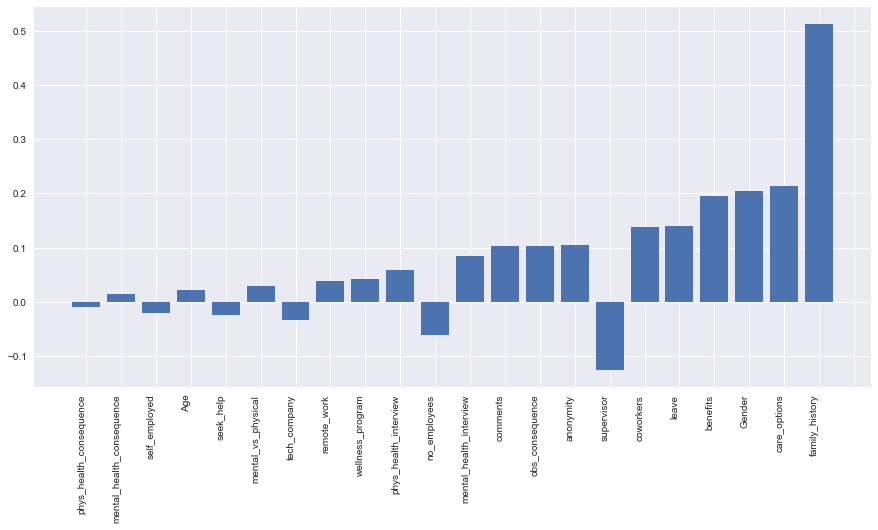

In [92]:
plt.figure(figsize=(15, 7))
plt.bar(np.arange(len(X_train.columns)),lab)
plt.xticks(np.arange(1+len(X_train.columns)),feature_names, rotation=90, ha='right')
plt.show()

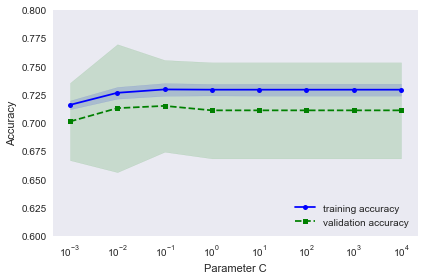

In [70]:
pipe_lr = Pipeline([('scl', StandardScaler()),
            #('pca', PCA(n_components=2)),
            ('clf', LogisticRegression(penalty='l2', C = 500, random_state=1))])
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.6, 0.8])
plt.tight_layout()
plt.show()